In [0]:
!pip install theano
!pip install tensorflow
!pip install keras

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 116kB/s 
     |████████████████████████████████| 3.1MB 27.7MB/s 
     |████████████████████████████████| 501kB 44.4MB/s 


ANN

In [0]:
import theano
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df.shape

(10000, 14)

In [0]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

In [0]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
le_geo = LabelEncoder()
X[:, 1] = le_geo.fit_transform(X[:, 1])

le_gender = LabelEncoder()
X[:, 2] = le_gender.fit_transform(X[:,2])

In [0]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [0]:
X = X[:, 1:] # Dummy variable trap prevention
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, random_state = 42, test_size = 0.2)

Building the ANN Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential() #Initialise the model

classifier.add(Dense(units = 6, activation = 'relu', kernel_initializer='uniform', input_shape = (11, )))
classifier.add(Dense(units = 12, activation = "relu", kernel_initializer="uniform"))
classifier.add(Dense(units = 1, activation="sigmoid", kernel_initializer="uniform"))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'mse'])

In [0]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 146us/sample - loss: 0.4866 - accuracy: 0.7940 - mse: 0.1593
Epoch 2/100
8000/8000 [==============================] - 1s 118us/sample - loss: 0.4312 - accuracy: 0.7945 - mse: 0.1371
Epoch 3/100
8000/8000 [==============================] - 1s 116us/sample - loss: 0.4242 - accuracy: 0.8036 - mse: 0.1337
Epoch 4/100
8000/8000 [==============================] - 1s 124us/sample - loss: 0.4200 - accuracy: 0.8254 - mse: 0.1317
Epoch 5/100
8000/8000 [==============================] - 1s 125us/sample - loss: 0.4178 - accuracy: 0.8294 - mse: 0.1305
Epoch 6/100
8000/8000 [==============================] - 1s 136us/sample - loss: 0.4162 - accuracy: 0.8315 - mse: 0.1297
Epoch 7/100
8000/8000 [==============================] - 1s 125us/sample - loss: 0.4143 - accuracy: 0.8322 - mse: 0.1290
Epoch 8/100
8000/8000 [==============

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y76_test, y_pred)
cm

array([[1522,   85],
       [ 239,  154]])

In [0]:
accuracy = (1522+154)/2000
accuracy

0.838

CNN

In [0]:
# Upgrading tensorflow
!pip uninstall tensorflow
!pip install tensorflow==2.0.0-beta1

import tensorflow
import theano
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Building CNN Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

classifier = Sequential()

classifier.add(Convolution2D(32,3,3, input_shape = (64, 64, 3), activation='relu')) #using tensorflow, we input the shape of the image first and then the colour layers, viceversa for theano
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64,3,3, activation='relu')) #using tensorflow, we input the shape of the image first and then the colour layers, viceversa for theano
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation = 'relu', kernel_initializer='uniform'))
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer='uniform'))

classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy', 'mse'])

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

img_width, img_height = 64, 64
train_data_dir = '/gdrive/My Drive/Colab Notebooks/dataset/training_set'
validation_data_dir = '/gdrive/My Drive/Colab Notebooks/dataset/test_set'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

classifier.fit_generator(
    train_generator,
    steps_per_epoch=8000, # Number of images in train set
    epochs=5,
    validation_data=validation_generator,
    validation_steps=2000) # Number of images in test set

Found 8006 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
8000/8000 [==============================] - 5315s 664ms/step - loss: 0.5993 - accuracy: 0.6680 - mse: 0.2070 - val_loss: 0.5808 - val_accuracy: 0.6950 - val_mse: 0.1971
Epoch 2/5
8000/8000 [==============================] - 1689s 211ms/step - loss: 0.5178 - accuracy: 0.7415 - mse: 0.1728 - val_loss: 0.5773 - val_accuracy: 0.7092 - val_mse: 0.1951
Epoch 3/5
8000/8000 [==============================] - 1673s 209ms/step - loss: 0.4778 - accuracy: 0.7674 - mse: 0.1575 - val_loss: 0.5871 - val_accuracy: 0.7086 - val_mse: 0.1945
Epoch 4/5
8000/8000 [==============================] - 1719s 215ms/step - loss: 0.4537 - accuracy: 0.7827 - mse: 0.1484 - val_loss: 0.5900 - val_accuracy: 0.7135 - val_mse: 0.1955
Epoch 5/5
8000/8000 [==============================] - 1699s 212ms/step - loss: 0.4325 - accuracy: 0.7

RNN

In [0]:
# Upgrading tensorflow
# !pip uninstall tensorflow
# !pip install tensorflow==2.0.0-beta1

import tensorflow
import theano
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Train.csv')

In [0]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
trainset = df_train.iloc[:,1:2].values
trainset.shape

(1258, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

train_sc = sc.fit_transform(trainset)
train_sc.shape

(1258, 1)

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_sc[i-60:i, 0])
    y_train.append(train_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
y_train.shape

(1198,)

In [0]:
X_train.shape

(1198, 60, 1)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 11s 9ms/sample - loss: 0.0398
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0058
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0042
Epoch 10/100
1198/1198 [====

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values # [1198:1298] ie 100 values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
len(dataset_total)-len(df_test)-60  # 1278 - 20 - 60 = 1198

1198

In [0]:
len(df_train['Open']) # 1258

1258

In [0]:
len(df_test['Open']) # 20

20

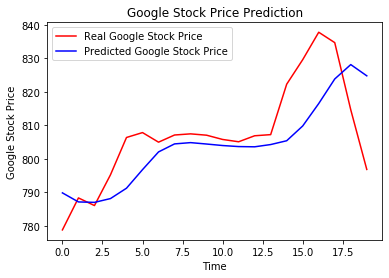

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

CNN CAR AND TRUCK

In [0]:
#Unzip the  dataset
!unzip '/content/Data_Cars and Trucks.zip'
#Splits the folders into training and testing
!pip install split_folders tqdm

In [0]:
# split Dataset folder into train and val folders
import split_folders
split_folders.ratio('/content/Datasets', output="data", seed=1337, ratio=(.8, .2))

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential()

model.add(Conv2D(32,3,3, input_shape = (64, 64, 3), activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3,3, kernel_initializer='uniform', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3,3, kernel_initializer='uniform', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3,3, kernel_initializer='uniform', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/data/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/data/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=629, # Number of images in train set
    epochs=5,
    validation_data=validation_generator,
    validation_steps=159) # Number of images in test set